In [16]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import torch
import torchvision
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as f
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from torchvision.datasets import FashionMNIST
import torch.optim as optim

In [2]:
dataset = FashionMNIST(root = 'data/', download = True, transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
train_loader = DataLoader(dataset, batch_size = 32)
# test_loader = DataLoader(dataset, batch_size = 64)

In [13]:
# for data in train_loader:
#     print(data)
#     break

In [4]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

In [5]:
a = next(iter(train_loader))

In [6]:
a[0].shape

torch.Size([32, 1, 28, 28])

In [7]:
len(dataset)

60000

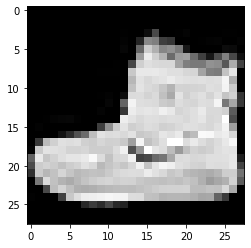

In [8]:
images,labels = next(iter(dataset))

plt.imshow(images.squeeze(), cmap = 'gray')

In [11]:
labels

9

In [12]:
import numpy as np

In [40]:
demo_loader = torch.utils.data.DataLoader(dataset, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])


labels:  Ankle Boot, T-shirt/Top, T-shirt/Top, Dress, T-shirt/Top, Pullover, Sneaker, Pullover, Sandal, Sandal, 

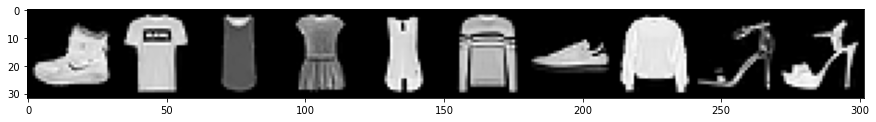

In [47]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")


In [50]:
image.shape

torch.Size([1, 28, 28])

In [13]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [14]:
model = FashionCNN()

In [15]:
error = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [18]:
epochs = 5
loss_f = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

for epoch in range(epochs):
    trainning_loss = 0.0
    for x,y in train_loader:
        y_pred = model(x)
        loss = loss_f(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        trainning_loss +=loss.item()
    print("epoch {}/{}  loss {}".format(epoch, epochs, trainning_loss/len(train_loader)))
        
        

epoch 0/5  loss 0.34205555125872295
epoch 1/5  loss 0.3253780569632848
epoch 2/5  loss 0.3117725005467733
epoch 3/5  loss 0.30037209396958353
epoch 4/5  loss 0.29061402859886487


In [30]:
def validate(model, train_loader):
    for image, label in train_loader:
        
        correct = 0
        total =  0
        with torch.no_grad():
            y_pred = model(image)
            _, predicted = torch.max(y_pred, dim = 1)
            
            total +=label.shape[0]
            correct = int((predicted==label).sum())
    print("Accuracy {}".format(correct/total))       
    

In [31]:
validate(model, train_loader)

Accuracy 0.9375


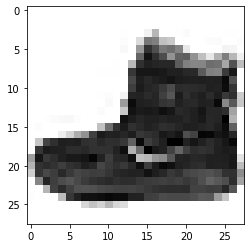

In [45]:
plt.imshow(images.permute(1,2,0), cmap = 'binary')

In [50]:
image = images.reshape(1,1,28,28)


In [51]:
image.shape

torch.Size([1, 1, 28, 28])

In [67]:
pred = model(image)
pred = torch.argmax(pred, dim = 1)
output_label(int(pred))

'Ankle Boot'

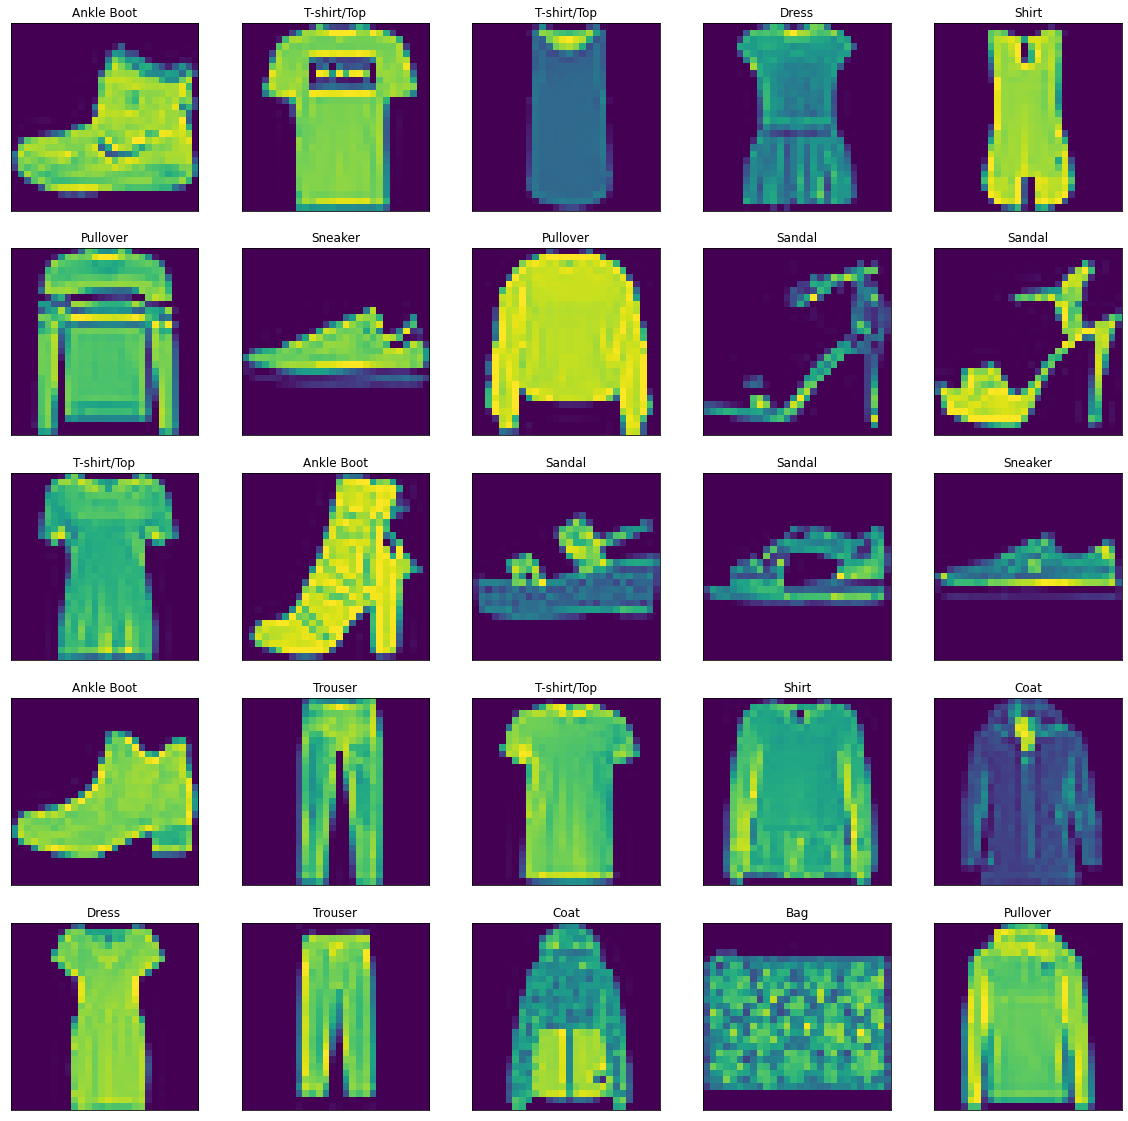

In [95]:
fig = plt.figure(figsize=(20,20))
for i in range(25):
        image, label = dataset[i]
        pred = model(image.reshape(1,1,28,28))
        pred = torch.argmax(pred)
        pred = output_label(int(pred))
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image.permute(1,2,0))
        plt.title(pred)        
#         plt.title(output_label(int(pred)))


In [35]:
torch.save(model.state_dict(), "/home/mikey/Desktop/Machine_learning/models/"+"mnist_torch.pt")

In [96]:
loaded_model = FashionCNN()
loaded_model.load_state_dict(torch.load("/home/mikey/Desktop/Machine_learning/models/"+"mnist_torch.pt"))

<All keys matched successfully>

In [97]:
print(loaded_model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


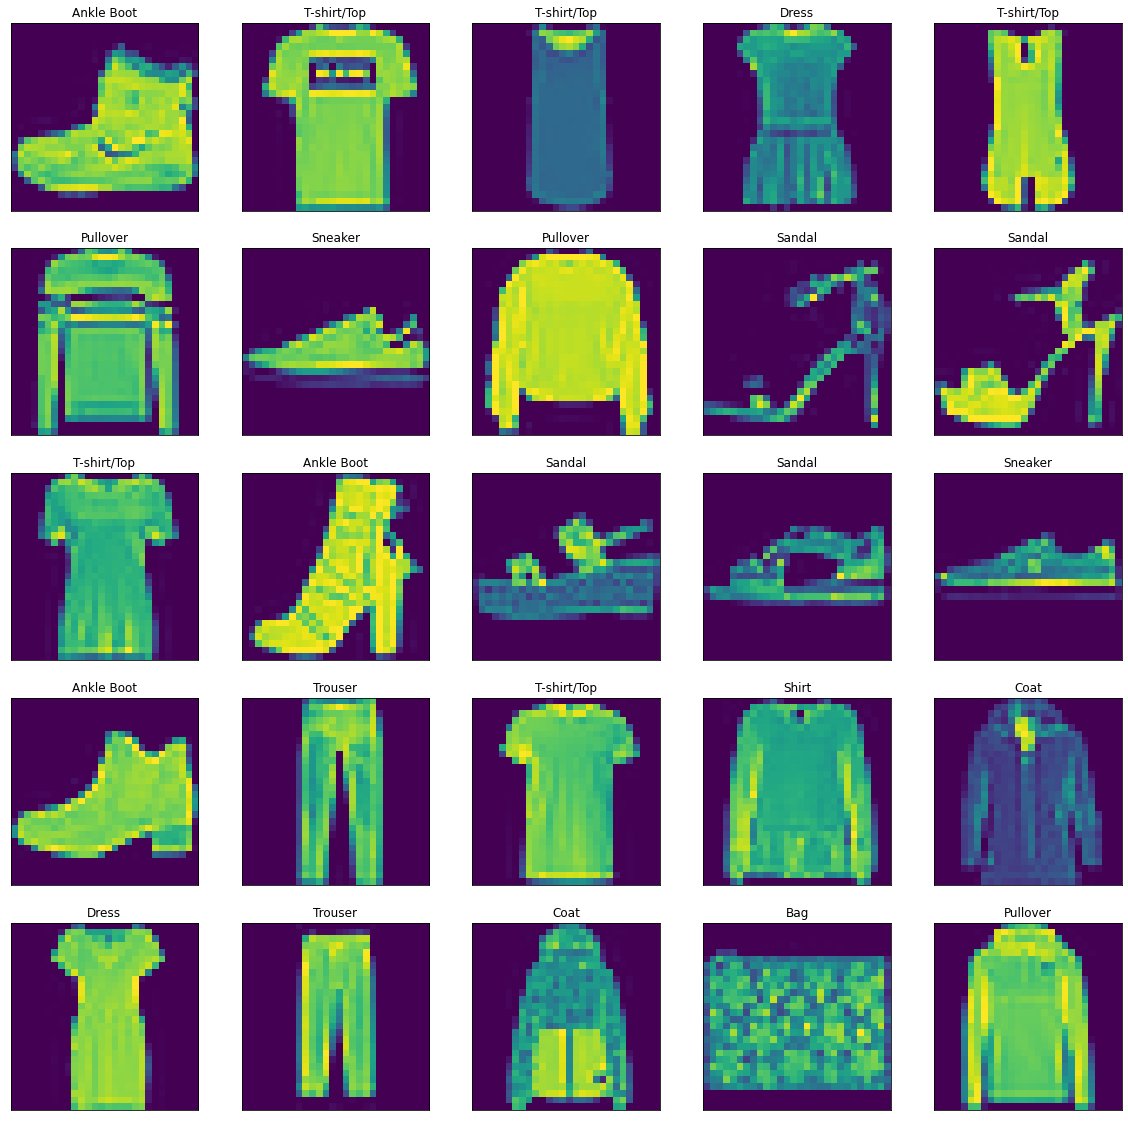

In [98]:
fig = plt.figure(figsize=(20,20))
for i in range(25):
        image, label = dataset[i]
        pred = loaded_model(image.reshape(1,1,28,28))
        pred = torch.argmax(pred)
        pred = output_label(int(pred))
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image.permute(1,2,0))
        plt.title(pred)        
#         plt.title(output_label(int(pred)))
